### The Facebook Followers dataset has been used for exploratory analysis. 
* This dataset is published on the data incubator blog for data analysis. 
* Exploratory of the features has been carried out using different plots. Data preprocessing has been done to get better view and respresentation.
* This project tackles the below question using the checkins metric that represents the foot traffic for restaurant, hospitality and retail businesses:
* Who are the top 5 companies who have the maximum checkins and belong to which categories? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# !set low_memory=False

In [29]:
data = pd.read_csv("C:\\Users\\dwnt2427\\PythonNotebooks\\Data_Incubator_competition\\temp_datalab_records_social_facebook.csv")

C:\Users\dwnt2427\AppData\Local\Continuum\anaconda3\envs\dlnd-tf-lab\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
data.head(5)

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [31]:
data.shape

(3621391, 14)

In [32]:
# the last columns are null so they are removed
columns_filtered = ['username', 'checkins', 'were_here_count', 'likes', 'talking_about_count', 'facebook_id']
data = data[columns_filtered]
data.head(5)

,username,checkins,were_here_count,likes,talking_about_count,facebook_id
0,SodaStream,0,0,761533,587,54885616308
1,ANSYSInc,148,0,43442,1305,160242297413411
2,MyAquaAmerica,0,0,5591,297,591693544195818
3,Qualcomm,173,0,1232521,2685,108472637291
4,eaglepharmaceuticals,0,0,18,0,1428265940729350


In [33]:
# remove null values to avoid errors  
data = data.dropna(inplace = True)  

In [34]:
# show statistics of the data
data.describe()

,checkins,were_here_count,likes,talking_about_count,facebook_id
count,3.500462e+06,3.500462e+06,3.500462e+06,3.500462e+06,3.500462e+06
mean,1.459108e+04,1.398283e+05,8.439430e+05,1.036674e+04,1.680695e+14
std,2.365935e+05,1.348850e+06,5.019451e+06,7.414411e+04,3.994996e+14
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.181544e+09
25%,0.000000e+00,0.000000e+00,2.810000e+03,3.100000e+01,9.220426e+10
50%,1.300000e+01,0.000000e+00,2.347800e+04,2.780000e+02,1.113497e+14
75%,3.010000e+02,1.280000e+02,2.314898e+05,2.648000e+03,1.906672e+14
max,1.729055e+07,3.682637e+07,2.106411e+08,5.747010e+06,1.015013e+16


### Step 1: The relationship between the features were not clear without any preprocessing as shown in the plots of the scatter matrix of density function and histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001796A8C3D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017967CA91D0>]], dtype=object)

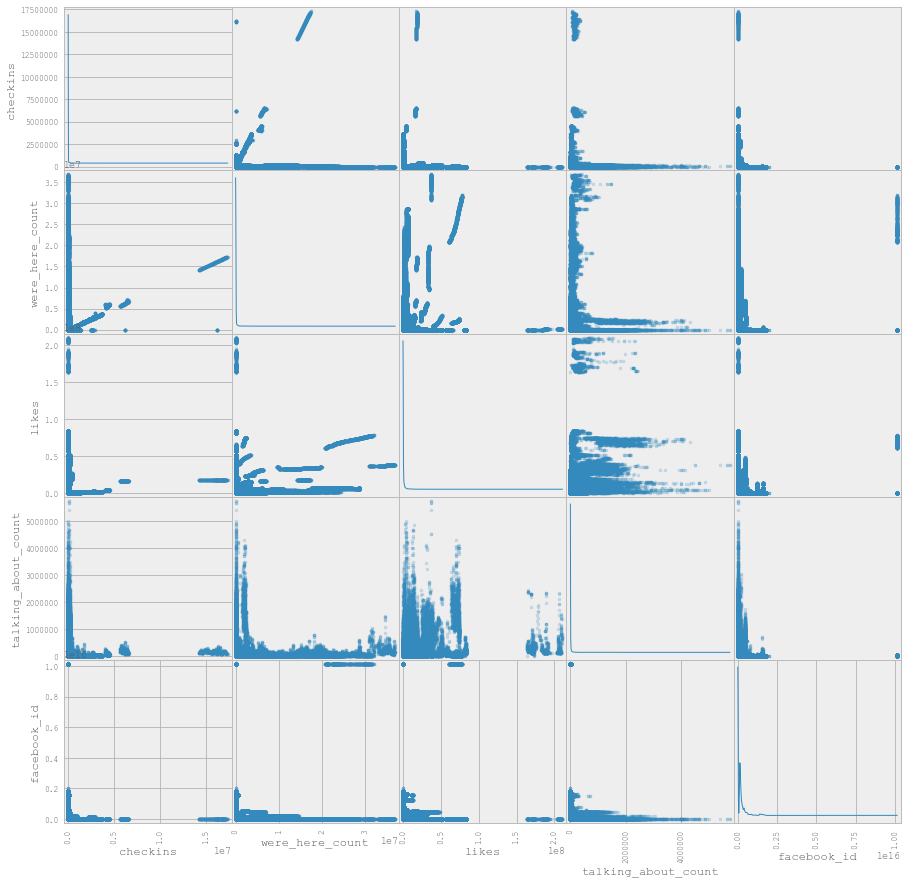

In [41]:
# data.boxplot(by='checkins', column='facebook_id', return_type='axes', fontsize='large', rot=45, figsize=(6, 6))
from pandas.tools.plotting import scatter_matrix

# plot kernel density function
scatter_matrix(data, alpha=0.2, figsize=(15, 15), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001796BB576D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017973959128>]], dtype=object)

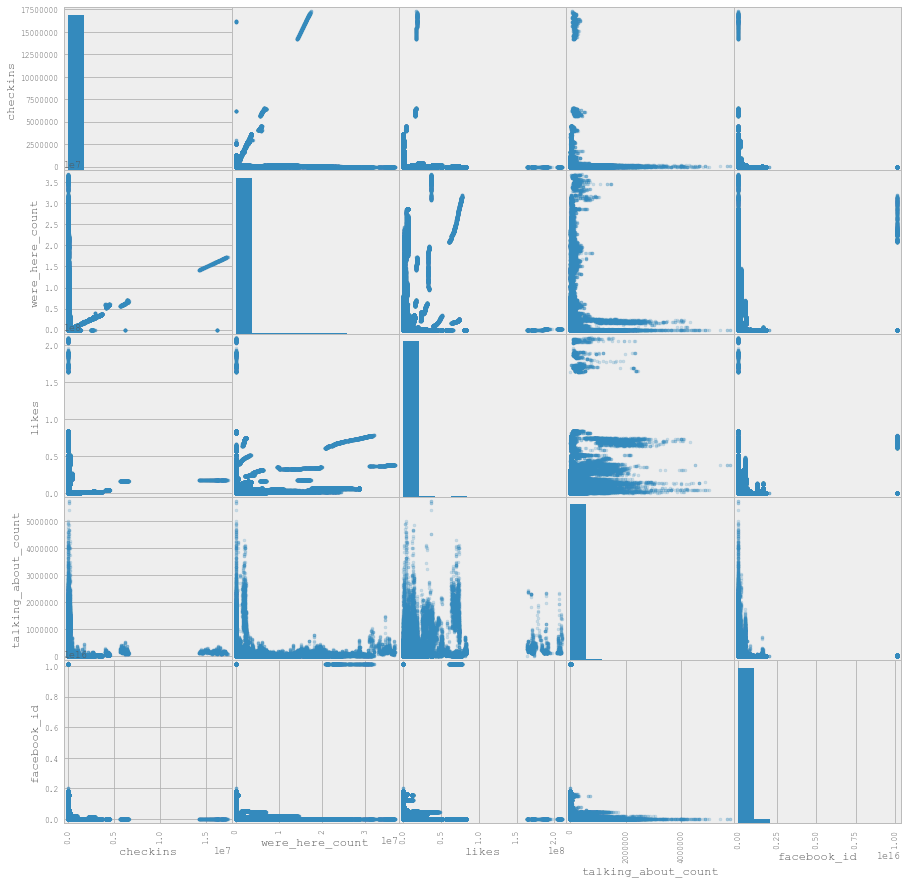

In [42]:
# plot historam
scatter_matrix(data, alpha=0.2, figsize=(15, 15), diagonal='hist')

### Step 2: To show better the variables, the following steps are taken: 1) normalization of the data 2) transform the columns by taking the logarithm of the values. The data is sampled to improve the processing time instead of running over the whole data

In [134]:
data = pd.read_csv("C:\\Users\\dwnt2427\\PythonNotebooks\\Data_Incubator_competition\\temp_datalab_records_social_facebook.csv") 

C:\Users\dwnt2427\AppData\Local\Continuum\anaconda3\envs\dlnd-tf-lab\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
# remove Zero values
data = data[(data != 0).all(1)] 

In [136]:
data.head(5)

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
6,53146,2015-01-01 05:00:00+00,UMBBank,173,f,173,6549,58,211199048925162,NaN,2017-02-14 03:47:46.670674+00,NaN,NaN,NaN
12,52880,2015-01-01 05:00:00+00,imagesensingsys,2,f,2,44,1,258838584186336,NaN,2017-02-14 02:48:58.269663+00,NaN,NaN,NaN
16,52692,2015-01-01 05:00:00+00,ChicopeeSavings,5,f,5,1085,66,186884128163522,NaN,2017-02-14 03:53:21.562903+00,NaN,NaN,NaN
19,53502,2015-01-01 05:00:00+00,servicenow,758,f,758,4570,184,70876467572,NaN,2017-02-14 06:57:57.472526+00,NaN,NaN,NaN
21,53612,2015-01-01 05:00:00+00,tripointehomes,21,f,21,676,24,186868411355494,NaN,2017-02-14 07:49:42.312818+00,NaN,NaN,NaN


In [137]:
# indexing the userIndex
def indexingColumn(column):
    unique_column = data[column].unique()
    index = np.arange(1, len(unique_column), step = 1)
    map_values = dict(zip(unique_column, index))
    # inverse_map_values = dict(zip(index, unique_column))
    return map_values

map_values = indexingColumn('username')

In [138]:
data['username'].astype(object)
data['userIndex'] = data['username'].map(map_values)

In [139]:
# statistical analysis of the data aftering removing Zeros from data
data.describe()

,dataset_id,checkins,were_here_count,likes,talking_about_count,facebook_id,entity_id,cusip,isin,userIndex
count,1.164943e+06,1.164943e+06,1.164943e+06,1.164943e+06,1.164943e+06,1.164943e+06,0.0,0.0,0.0,1.164941e+06
mean,3.007049e+05,3.631125e+04,2.436165e+05,6.818862e+05,6.098566e+03,1.958636e+14,NaN,NaN,NaN,7.440934e+02
std,4.124696e+05,3.959132e+05,1.620932e+06,5.772090e+06,6.134337e+04,5.456372e+14,NaN,NaN,NaN,5.060268e+02
min,5.261200e+04,1.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,5.526865e+09,NaN,NaN,NaN,1.000000e+00
25%,5.352900e+04,4.000000e+01,4.900000e+01,1.300000e+03,1.800000e+01,1.050447e+11,NaN,NaN,NaN,3.370000e+02
50%,6.395500e+04,1.920000e+02,2.590000e+02,5.803000e+03,1.060000e+02,1.192825e+14,NaN,NaN,NaN,6.580000e+02
75%,8.690580e+05,1.236000e+03,2.329000e+03,4.755100e+04,1.071000e+03,2.066841e+14,NaN,NaN,NaN,1.115000e+03
max,2.340089e+06,1.729055e+07,3.193979e+07,2.106411e+08,4.300475e+06,1.015013e+16,NaN,NaN,NaN,2.047000e+03


In [107]:
from sklearn import preprocessing

# filter the data
columns_filtered = ['userIndex', 'checkins', 'were_here_count', 'likes', 'talking_about_count', 'facebook_id']
df = data[columns_filtered]

# sampling the data
sample_df1 = df.sample(n=10000,random_state=1)

# normalization of the data
x = sample_df1.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
sample_df1_scaled = pd.DataFrame(x_scaled)

# renaming the columns
sample_df1_scaled = sample_df1_scaled.rename(columns={'0': 'userIndex', '1': 'checkins', '2': 'were_here_count', '3': 'likes', '4':'talking_about_count', '5':'facebook_id'})
sample_df1_scaled.columns = ['userIndex', 'checkins', 'were_here_count', 'likes', 'talking_about_count', 'facebook_id']

sample_df1_scaled = sample_df1_scaled[(sample_df1_scaled != 0).all(1)] 

# transformation of the data by taking the logarithm of each column
sample_df1_scaled['log_checkins'] = np.log10(sample_df1_scaled['checkins'])
sample_df1_scaled['log_were_here_count'] = np.log10(sample_df1_scaled['were_here_count'])
sample_df1_scaled['log_likes'] = np.log10(sample_df1_scaled['likes'])
sample_df1_scaled['log_talking_about_count'] = np.log10(sample_df1_scaled['talking_about_count'])
sample_df1_scaled['log_facebook_id'] = np.log10(sample_df1_scaled['facebook_id'])

sample_df1_scaled = sample_df1_scaled.drop(['checkins', 'were_here_count', 'likes', 'talking_about_count', 'facebook_id'], axis = 1)

sample_df1_scaled.head(5)


,userIndex,log_checkins,log_were_here_count,log_likes,log_talking_about_count,log_facebook_id
0,0.243769,-3.622796,-3.899781,-3.567472,-3.353428,-4.857742
1,0.127617,-5.061588,-5.338573,-4.358102,-4.241252,-1.477315
2,0.185942,-6.111997,-6.388982,-3.193276,-3.685903,-1.425182
3,0.774676,-5.419761,-5.696746,-4.776321,-4.652244,-5.344218
4,0.456630,-4.569842,-4.846828,-5.027765,-5.821036,-1.894387


### The following observations are noticed from the below pairplots:
* The pairplot shows positive correlation between userIndex and each of the features were_here_count, likes, and talking_about_count. 
* There is a tendency of increase appeared in the relationship between the features: For example: checkins and were_here_count, checkins and likes, ..etc 
* The histograms displayed in the diagonal shows positive skewness except for the facebook_id histogram that shows both left skewed distribution (negative) and right skewed distribution (positive)
* The plots of the facebook_id against the other features in the first row indicate there could be positive and negative tendency as for example likes and dislikes

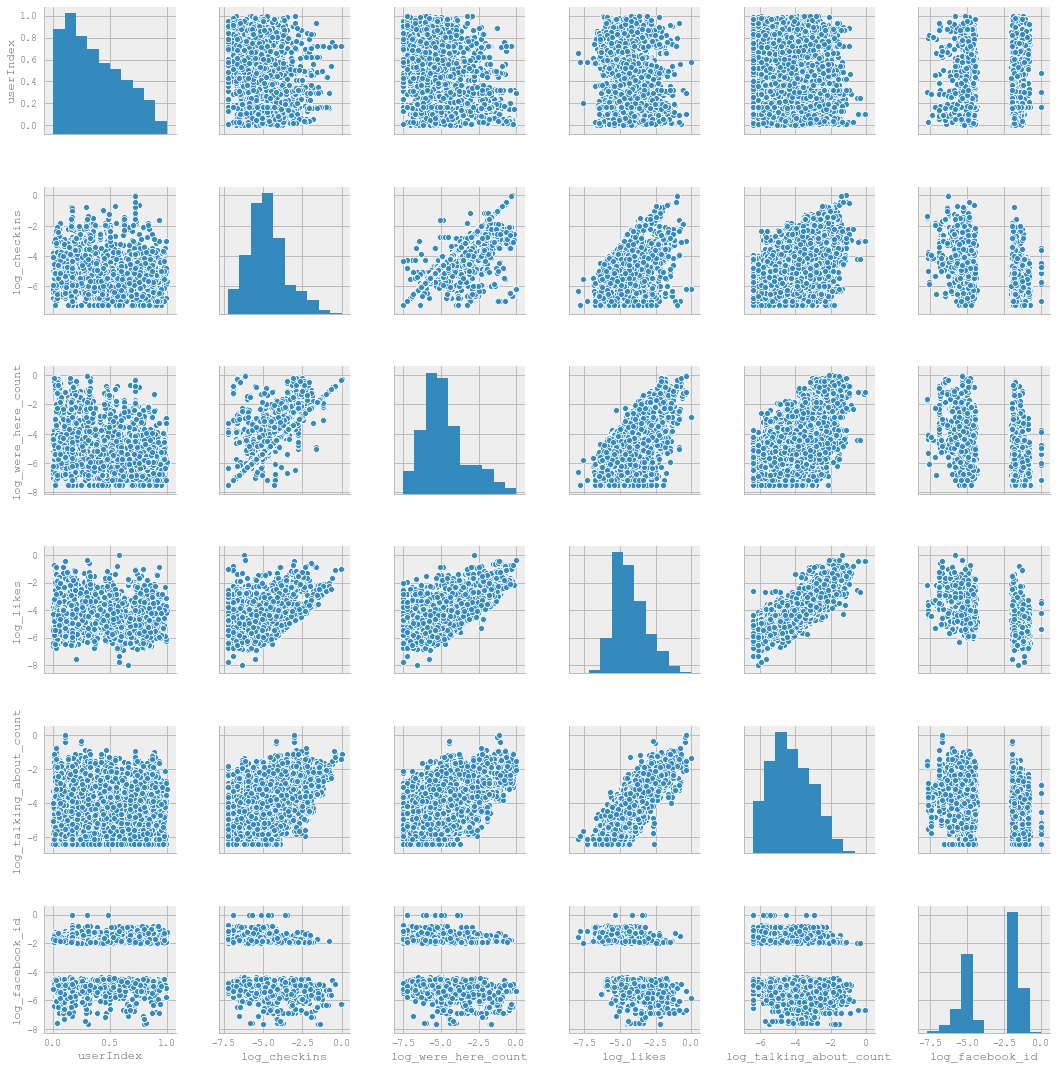

In [109]:
# plot kernel density function
# scatter_matrix(normalized_df, alpha=0.2, figsize=(15, 15), diagonal='kde')

# Seaborn visualization library (better viewer than scatter_matrix)
import seaborn as sns
# Create the default pairplot
sns.pairplot(sample_df1_scaled)

### The boxplot diagram shows the following:
* There is a slight skewness to the right for each of the checkins, were_here_count, likes, and talking_about_count
* facebook_id plot has a significant skewness to the left
* The bottom whisker is longer than the top whisker for checkins, were_here_count, and talking about count whereas the opposite for facebook_id
* There are outliers for each of the checkins, were_here_count, likes, and talking_about_count

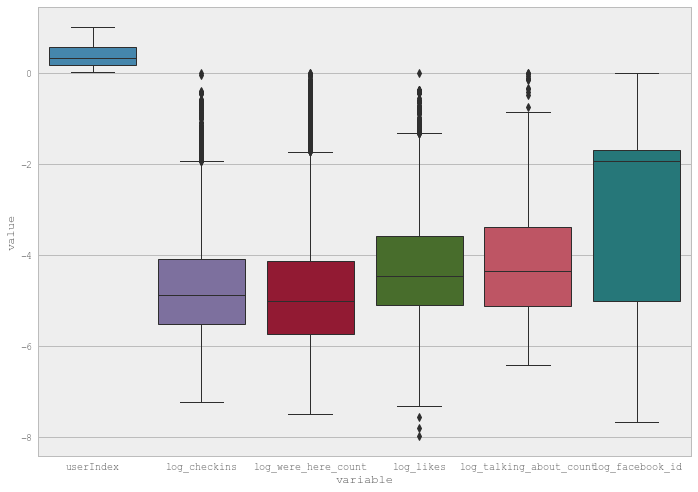

In [119]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
# create boxplot
sns.boxplot(ax=ax, x="variable", y="value", data=pd.melt(sample_df1_scaled))

### This section tackles who are the top 5 companies who have the maximum checkins and belong to which categories?

In [121]:
data = pd.read_csv("C:\\Users\\dwnt2427\\PythonNotebooks\\Data_Incubator_competition\\temp_datalab_records_social_facebook.csv")

C:\Users\dwnt2427\AppData\Local\Continuum\anaconda3\envs\dlnd-tf-lab\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [122]:
# check the username is not empty 
data = data[pd.notnull(data['username'])]

In [123]:
data.shape

(3500462, 14)

In [23]:
# data.dtypes

In [124]:
data['username'].value_counts() [:5]

SPG          1222
ModelNInc    1222
TiVo         1222
aflacduck    1222
2u           1222
Name: username, dtype: int64

In [125]:
df = data[['username', 'checkins']] 

In [126]:
df.head()

,username,checkins
0,SodaStream,0
1,ANSYSInc,148
2,MyAquaAmerica,0
3,Qualcomm,173
4,eaglepharmaceuticals,0


In [127]:
df_grouped = df.groupby(['username'], as_index=False).agg({"checkins": "sum"})
df_grouped

,username,checkins
0,1011News,3914
1,1019thewolf,889125
2,1027WGUS,0
3,105.7WROR,29512
4,1079mixfm,430956
5,10best,0
6,1800flowers,0
7,1ShoppingCart,11808
8,1st.Sec.Bank,177165
9,1stDetect,0


In [128]:
df_grouped = df_grouped[df_grouped.checkins != 0]
df_grouped.shape

(3007, 2)

In [129]:
# sort in descending order
df_grouped = df_grouped.sort_values(by='checkins', ascending=False)
df_grouped

,username,checkins
788,Disneyland,7966491074
2904,WaltDisneyWorld,3057713075
1492,KnottsBerryFarm,2400647362
2428,SeaWorld,2346420768
2669,TheGarden,2139298637
789,DisneylandParisfr,2028963568
432,BuschGardensTampaBay,1817112592
3338,cedarpoint,1323897601
3595,empirestatebuilding,1304477805
4924,wynnlasvegas,959992611


In [130]:
# Top n in checkins
# df_grouped.nlargest(10, ['checkins']) 
top_winners = df_grouped['username'][:5].tolist()
print('top_winners ', top_winners)
checkins = df_grouped['checkins'][:5].tolist()
print('max checkins ', checkins)
df_cutoff_rows = df_grouped[:5]
# Amusement places

top_winners  ['Disneyland', 'WaltDisneyWorld', 'KnottsBerryFarm', 'SeaWorld', 'TheGarden']
max checkins  [7966491074, 3057713075, 2400647362, 2346420768, 2139298637]


In [131]:
df_cutoff_rows

,username,checkins
788,Disneyland,7966491074
2904,WaltDisneyWorld,3057713075
1492,KnottsBerryFarm,2400647362
2428,SeaWorld,2346420768
2669,TheGarden,2139298637


In [132]:
len(df_cutoff_rows['checkins'].tolist())

5

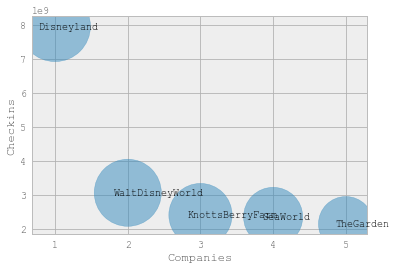

In [133]:
# plot diagram between the top 5 companies and checkins

import matplotlib.transforms as transforms

x = np.arange(start=1, stop=6, step=1)
y = df_cutoff_rows['checkins'].tolist()
z = np.arange(start=50, stop=1, step=-5)
    
f, ax = plt.subplots(1, 1)
ax.scatter(x, y, s=z*100, alpha=.5) 

for i, txt in enumerate(df_cutoff_rows.username):
    # it is approx the radius of the disc + 17 points to the left
    dx, dy = np.sqrt(i*10)/f.dpi - 17/f.dpi, 0.
    offset = transforms.ScaledTranslation(dx, dy, f.dpi_scale_trans)
    ax.text(x[i], y[i], s=txt, va='center',  ha='left', transform=ax.transData + offset)

ax.set_xlabel('Companies')
ax.set_ylabel('Checkins')

plt.show()

### Analysis of the bubbles/ scatter Diagram
#### The diagram showed that the winners are Disneyland, WaltDisneyWorld, KnottsBerryFarm, SeaWorld, and TheGarden and these companies/ users are placed under the same category of amusement places. 
#### The diagram also showed that Disneyland exceeds by an increase of 3.3% on average against the other companies and that the checkins for these companies have nearly close figures.